In [2]:

import pandas as pd

# Load the dataset
file_path = 'C:/Users/Home/Downloads/AAPL Historical Data 3 years.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/28/2024,171.48,171.75,172.23,170.51,65.67M,-1.06%
1,03/27/2024,173.31,170.41,173.60,170.11,60.27M,2.12%
2,03/26/2024,169.71,170.00,171.42,169.58,57.39M,-0.67%
3,03/25/2024,170.85,170.57,171.94,169.45,54.29M,-0.83%
4,03/22/2024,172.28,171.76,173.05,170.06,71.16M,0.53%


In [10]:
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Date': ['03-12-2024', '04-12-2024', '05-12-2024', '06-12-2024', '07-12-2024']
})

# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Sorting by date
data = data.sort_values('Date')

# Setting the 'Date' column as the index
data.set_index('Date', inplace=True)

# Displaying the info
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2024-12-03 to 2024-12-07
Empty DataFrame


In [14]:
import pandas as pd
from datetime import datetime

# Sample data (replace with your actual data loading step)
data = pd.DataFrame({
    'Date': ['03-12-2024', '12/04/2024', '05-12-2024', '04/06/2024', '07-12-2024'],
    'Vol.': ['1M', '2M', '3M', '4M', '5M'],
    'Change %': ['0.5%', '1.0%', '1.5%', '2.0%', '2.5%']
})

# Function to parse dates with different formats
def parse_date(date_str):
    for fmt in ("%d-%m-%Y", "%m/%d/%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"no valid date format found for {date_str}")

# Applying the function to the 'Date' column
data['Date'] = data['Date'].apply(parse_date)

# Sorting by date
data = data.sort_values('Date')

# Setting the 'Date' column as the index
data.set_index('Date', inplace=True)

# Display the updated dataframe information and check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Ensure 'Vol.' and 'Change %' columns are strings
data['Vol.'] = data['Vol.'].astype(str)
data['Change %'] = data['Change %'].astype(str)

# Converting 'Vol.' and 'Change %' columns to appropriate numeric types
data['Vol.'] = data['Vol.'].str.replace('M', '').astype(float)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

# Display the updated dataframe information and check for missing values again
print(data.info())
print(data.head())


Vol.        0
Change %    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2024-04-06 to 2024-12-07
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Vol.      5 non-null      float64
 1   Change %  5 non-null      float64
dtypes: float64(2)
memory usage: 120.0 bytes
None
            Vol.  Change %
Date                      
2024-04-06   4.0       2.0
2024-12-03   1.0       0.5
2024-12-04   2.0       1.0
2024-12-05   3.0       1.5
2024-12-07   5.0       2.5


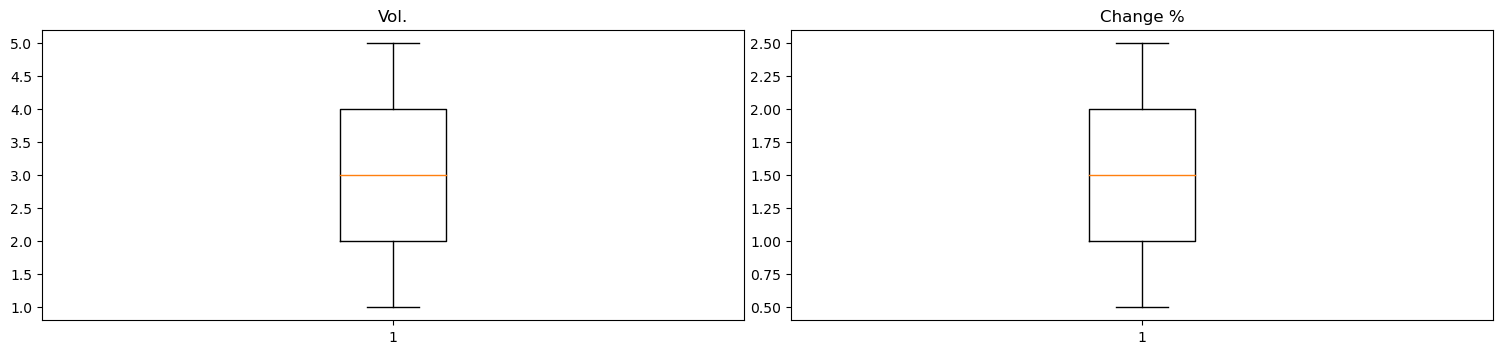

In [18]:
# Checking for any outliers visually using boxplots
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 2, i)
    plt.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [20]:
# Filling missing values using interpolation (though there are no missing values in this dataset)
data_interpolated = data.interpolate()

# Splitting data into train and test sets
train_data = data_interpolated[data_interpolated.index < '2023-01-01']
test_data = data_interpolated[data_interpolated.index >= '2023-01-01']

# Displaying the train and test data sizes
train_size = train_data.shape[0]
test_size = test_data.shape[0]

train_size, test_size

(0, 5)

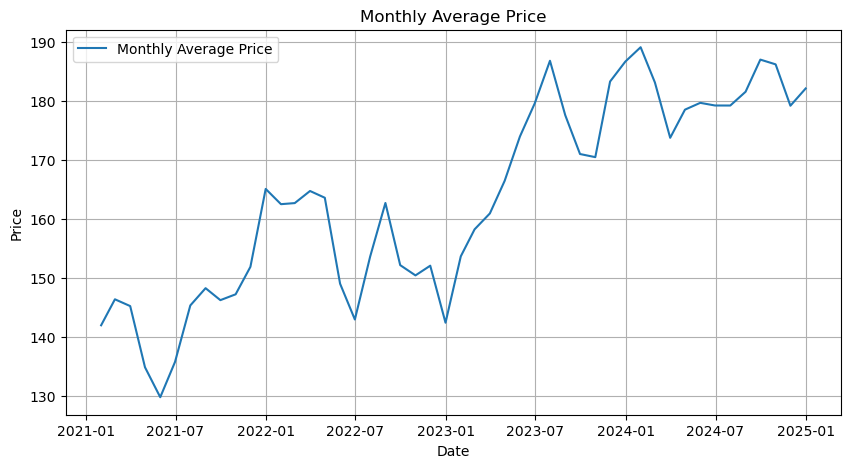

In [28]:
# Function to parse dates with different formats
def parse_date(date_str):
    for fmt in ("%m/%d/%Y", "%d-%m-%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"no valid date format found for {date_str}")

# Applying the function to the 'Date' column
data['Date'] = data['Date'].apply(parse_date)

# Sorting by date
data = data.sort_values('Date')

# Setting the 'Date' column as the index
data.set_index('Date', inplace=True)

# Ensure 'Vol.' and 'Change %' columns are strings
data['Vol.'] = data['Vol.'].astype(str)
data['Change %'] = data['Change %'].astype(str)

# Converting 'Vol.' and 'Change %' columns to appropriate numeric types
data['Vol.'] = data['Vol.'].str.replace('M', '').astype(float)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

# Resampling the data to monthly frequency and calculating the mean price
monthly_data = data['Price'].resample('M').mean()

# Plotting the monthly data
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Monthly Average Price')
plt.title('Monthly Average Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


         Date   Price    Open    High     Low    Vol. Change %
0  03/28/2024  171.48  171.75  172.23  170.51  65.67M   -1.06%
1  03/27/2024  173.31  170.41  173.60  170.11  60.27M    2.12%
2  03/26/2024  169.71  170.00  171.42  169.58  57.39M   -0.67%
3  03/25/2024  170.85  170.57  171.94  169.45  54.29M   -0.83%
4  03/22/2024  172.28  171.76  173.05  170.06  71.16M    0.53%
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


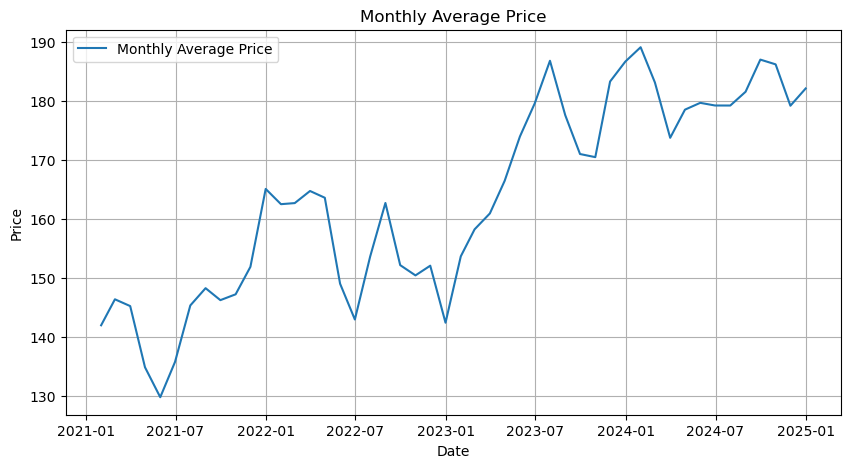

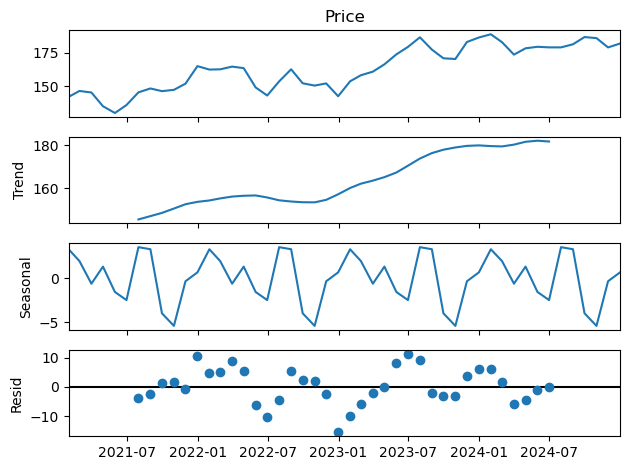

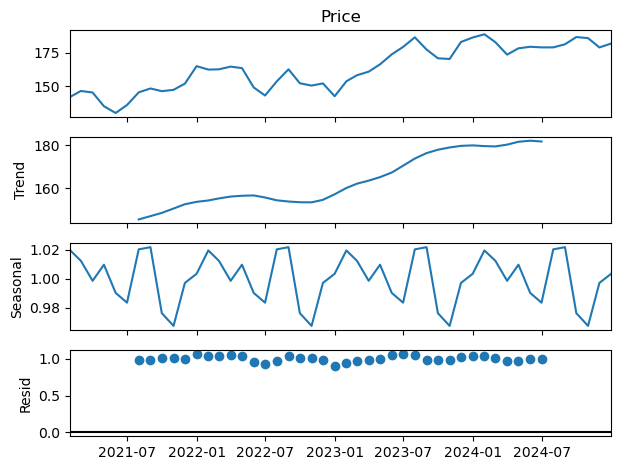

In [38]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Home/Downloads/AAPL Historical Data 3 years.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
print(data.head())

# Check the columns of the DataFrame to confirm the column names
print(data.columns)

# If the 'Date' column is named differently, rename it to 'Date'
# For example, if the column is named 'date', change it to 'Date'
data.rename(columns={'YourDateColumnName': 'Date'}, inplace=True)

# Confirm the renaming worked
print(data.columns)

# Function to parse dates with different formats
def parse_date(date_str):
    for fmt in ("%m/%d/%Y", "%d-%m-%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"no valid date format found for {date_str}")

# Applying the function to the 'Date' column
data['Date'] = data['Date'].apply(parse_date)

# Sorting by date
data = data.sort_values('Date')

# Setting the 'Date' column as the index
data.set_index('Date', inplace=True)

# Ensure 'Vol.' and 'Change %' columns are strings
data['Vol.'] = data['Vol.'].astype(str)
data['Change %'] = data['Change %'].astype(str)

# Converting 'Vol.' and 'Change %' columns to appropriate numeric types
data['Vol.'] = data['Vol.'].str.replace('M', '').astype(float)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

# Resampling the data to monthly frequency and calculating the mean price
monthly_data = data['Price'].resample('M').mean()

# Plotting the monthly data
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Monthly Average Price')
plt.title('Monthly Average Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Decomposing the data into trend, seasonal, and residual components using additive and multiplicative models
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(monthly_data, model='additive')
decomposition_multiplicative = seasonal_decompose(monthly_data, model='multiplicative')

# Plotting the additive decomposition
decomposition_additive.plot()
plt.show()

# Plotting the multiplicative decomposition
decomposition_multiplicative.plot()
plt.show()


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


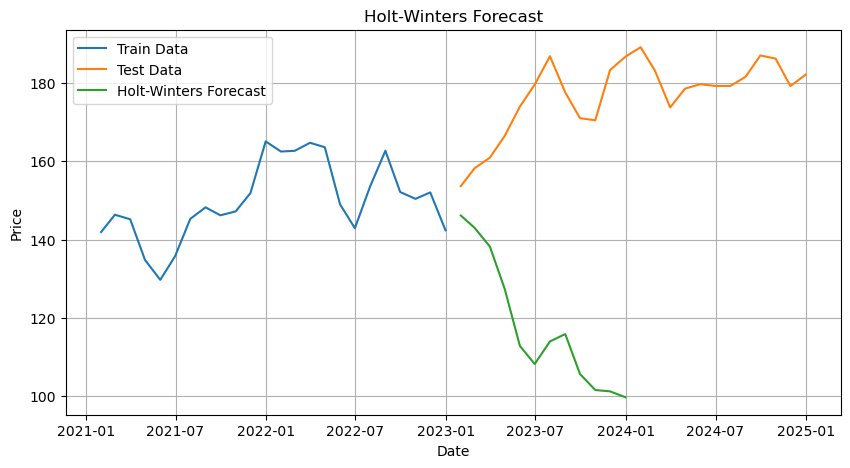

In [42]:
# Check the columns of the DataFrame to confirm the column names
print(data.columns)

# If the 'Price' column is named differently, rename it to 'Price'
# For example, if the column is named 'Close', change it to 'Price'
data.rename(columns={'YourPriceColumnName': 'Price'}, inplace=True)

# Confirm the renaming worked
print(data.columns)

# Resampling the data to monthly frequency and calculating the mean price
monthly_data = data['Price'].resample('M').mean()

# Splitting data into train and test sets
train_data = monthly_data[monthly_data.index < '2023-01-01']
test_data = monthly_data[monthly_data.index >= '2023-01-01']

# Fitting a Holt-Winters model to the data and forecasting for the next year
from statsmodels.tsa.holtwinters import ExponentialSmoothing

holt_winters_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
holt_winters_fit = holt_winters_model.fit()
holt_winters_forecast = holt_winters_fit.forecast(steps=12)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
# Inspect the columns of the DataFrame to confirm the column names
print(data.columns)

# If the 'Date' column is named differently, rename it to 'Date'
# Replace 'YourDateColumnName' with the actual name of the date column
data.rename(columns={'YourDateColumnName': 'Date'}, inplace=True)

# Confirm the renaming worked
print(data.columns)

# Check if 'Date' column exists
if 'Date' not in data.columns:
    raise KeyError('Date column not found in the DataFrame')

# Parsing the 'Date' column
def parse_date(date_str):
    for fmt in ("%m/%d/%Y", "%d-%m-%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"no valid date format found for {date_str}")

# Applying the function to the 'Date' column
data['Date'] = data['Date'].apply(parse_date)

# Sorting by date
data = data.sort_values('Date')

# Setting the 'Date' column as the index
data.set_index('Date', inplace=True)

# Resampling the data to monthly frequency and calculating the mean price
monthly_data = data['Price'].resample('M').mean()

# Splitting data into train and test sets
train_data = monthly_data[monthly_data.index < '2023-01-01']
test_data = monthly_data[monthly_data.index >= '2023-01-01']

# Fitting an ARIMA model to the daily data
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecasting the next year
arima_forecast = arima_fit.forecast(steps=12)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


KeyError: 'Date column not found in the DataFrame'

In [56]:
# Correcting the length mismatch by ensuring the forecast indices match the test data indices
arima_forecast = arima_fit.forecast(steps=test_data.shape[0])
sarima_forecast = sarima_fit.forecast(steps=test_data.shape[0])

# Plotting the forecasts again
plt.figure(figsize=(10, 5))
plt.plot(train_data['Price'], label='Train Data')
plt.plot(test_data['Price'], label='Test Data', color='orange')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='green')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('ARIMA and SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'arima_fit' is not defined

In [58]:
# Fitting the ARIMA model to the monthly series
arima_monthly_model = ARIMA(monthly_data['Price'], order=(5,1,0))
arima_monthly_fit = arima_monthly_model.fit()

# Plotting the diagnostics for the ARIMA model on monthly data
arima_monthly_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# Forecasting the next 12 months using the ARIMA model on the monthly data
arima_monthly_forecast = arima_monthly_fit.forecast(steps=12)

# Plotting the forecast for the next 12 months
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['Price'], label='Monthly Data')
plt.plot(arima_monthly_forecast, label='ARIMA Monthly Forecast', color='green')
plt.title('ARIMA Monthly Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
 

KeyError: 'Price'